<a href="https://colab.research.google.com/github/marcosfelt/interview_study_plan/blob/main/algorithms/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear and Logistic Regression

Implementing linear regression and logistic regression.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Ordinary least squares

The model:

$y_i = \sum_{j=1}^m\beta_jx_j^i$

where $\beta_i \forall i=1\dots m$ are the coefficients and $m$ is th number of features. $y$ is the output. Let $\overrightarrow\beta$ be the vector of all coefficients.



In [102]:
# Parameters
seed = 100
n = 100
test_size = 0.2

# Generate some data
d = 2
rng = np.random.default_rng(seed)
X = rng.random(size=(n, d))
y = 3*X[:, 0] - 0.1*X[:, 1] + 4 +  0.1 * rng.normal(size=(n))
cutoff =  int(test_size * n)
idx = np.arange(n)
train_idx, test_idx = idx[:cutoff], idx[cutoff:]

# Normalize variables
X_mu_tr, X_std_tr = X[train_idx].mean(axis=0),X[train_idx].std(axis=0)
y_mu_tr, y_std_tr = y[train_idx].mean(), y[train_idx].std()
X_s_tr = (X[train_idx]-X_mu_tr)/X_std_tr
y_s_tr = (y[train_idx]-y_mu_tr)/y_std_tr
X_s_ts = (X[test_idx]-X_mu_tr)/X_std_tr
y_s_ts = (y[test_idx]-y_mu_tr)/y_std_tr

### Direct method

Using matrices can write as:

$y = X \overrightarrow  \beta$

We'd like to find the coefficients that minimize the following least squares objective:

$ \hat{\overrightarrow \beta} = \min \sum_{i=1}^n (y- \hat y)^2$

If you expand and set the first derivative equal to zero, you can arrive at:

$\hat{\overrightarrow \beta}= (X^T X)^{-1}X^Ty$


In [115]:

# Least squares
beta = np.linalg.inv(X_s_tr.T@X_s_tr)@X_s_tr.T@y_s_tr
print("Coefficients:", beta)

Coefficients: [ 0.99839248 -0.02647705]


Text(0.5, 1.0, 'Test Predictions')

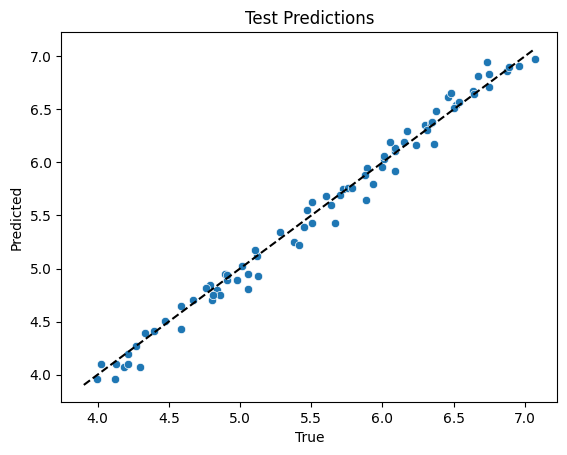

In [116]:
# Test predictions
y_hat = (X_s_ts@beta * y_std_tr) + y_mu_tr
ax = sns.scatterplot(x=y[test_idx], y=y_hat)
min_y = min(y.min(), y_hat.min())
max_y = max(y.max(), y_hat.max())
ax.plot([min_y, max_y], [min_y, max_y], 'k--')
ax.set_xlabel("True")
ax.set_ylabel("Predicted")
ax.set_title("Test Predictions")

In [ ]:
# Coefficient of determination (how much of variance in true explained by predicted)
y_ts = y[test_idx]
ss_reg = ((y_ts - y_hat)**2).sum()
ss_total = ((y_ts - y_ts.mean())**2).sum()
r2 = 1 - ss_reg/ss_total
print(f"R2={r2:.02f}")

R2=0.99


### Linear regression with gradient descent

The direct solution is nice but requires matrix inversion, which is $O(n^3)$ in time. Therefore, for large datasets, we might prefer an alternative.

Gradient descent allows us to start with random weights and then follow the path of the graident (derivative of squared loss w.r.t. coefficients) to find the optimal $\hat{\overrightarrow \beta}$.

$ \beta_j \leftarrow \beta_j - \frac{\alpha}{n} \sum_{i=1}^n (y^i - {\hat y}^i)x^i_j$

where $\alpha$ is the learning rate. This is conveninetly $O(iter*n)$ where $iter$ is the number of iterations, so it's useful in cases where $iter << n$.

Resource [here](https://www.cs.toronto.edu/~rgrosse/courses/csc411_f18/slides/lec06-slides.pdf). Also matrix derivative [here](https://en.wikipedia.org/wiki/Linear_regression#Least-squares_estimation_and_related_techniques).

In [130]:
rng_gd = np.random.default_rng(seed)
beta = rng_gd.normal(size=d)
print(f"Initial coefficients: {beta}")

iters = 1000
alpha = 0.001
losses = []
for iter in range(iters):
  # Calculate derivative
  dL_dbeta = -X_s_tr.T@y_s_tr + X_s_tr.T@X_s_tr@beta

  # Take a gradient descent step
  beta = beta - alpha*dL_dbeta

  # Calculate loss
  loss = np.linalg.norm(X_s_tr@beta - y_s_tr, ord=2)
  losses.append(loss)
  if iter % 100 == 0:
    print(f"Iteration {iter}, loss: {loss:.03f}")
print(f"Final coefficients: {beta}, final loss: {loss:.03f}")

Initial coefficients: [-1.15754965  0.2897558 ]
Iteration 0, loss: 9.302
Iteration 100, loss: 1.547
Iteration 200, loss: 0.569
Iteration 300, loss: 0.504
Iteration 400, loss: 0.502
Iteration 500, loss: 0.502
Iteration 600, loss: 0.502
Iteration 700, loss: 0.502
Iteration 800, loss: 0.502
Iteration 900, loss: 0.502
Final coefficients: [ 0.99839238 -0.02647695], final loss: 0.502


Text(0, 0.5, 'MSE loss')

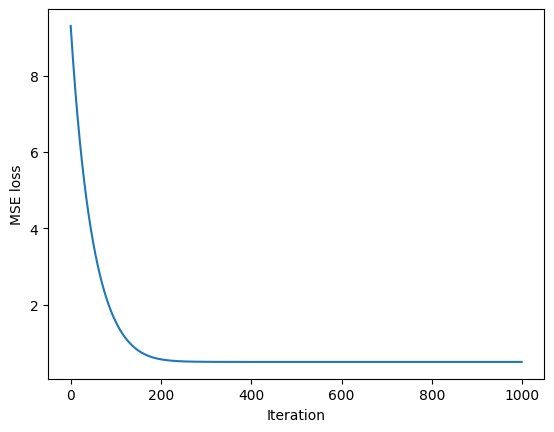

In [134]:
ax = sns.lineplot(x=np.arange(iters), y=losses)
ax.set_xlabel("Iteration")
ax.set_ylabel("MSE loss")

Text(0.5, 1.0, 'Test Predictions')

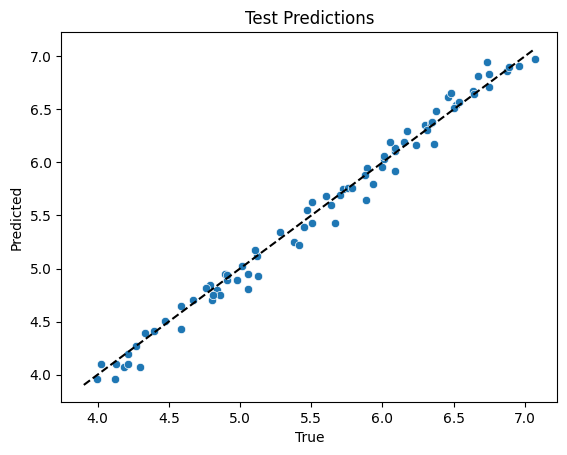

In [127]:
# Test predictions
y_hat = (X_s_ts@beta * y_std_tr) + y_mu_tr
ax = sns.scatterplot(x=y[test_idx], y=y_hat)
min_y = min(y.min(), y_hat.min())
max_y = max(y.max(), y_hat.max())
ax.plot([min_y, max_y], [min_y, max_y], 'k--')
ax.set_xlabel("True")
ax.set_ylabel("Predicted")
ax.set_title("Test Predictions")

In [128]:
# Coefficient of determination (how much of variance in true explained by predicted)
y_ts = y[test_idx]
ss_reg = ((y_ts - y_hat)**2).sum()
ss_total = ((y_ts - y_ts.mean())**2).sum()
r2 = 1 - ss_reg/ss_total
print(f"R2={r2:.02f}")

R2=0.99


## Logistic Regression

Logistic regression is used for classification.

In [ ]:
# Parameters
seed = 100
n = 100
test_size = 0.2

# Generate some data
d = 2
rng = np.random.default_rng(seed)
X = rng.random(size=(n, d))
y = 3*X[:, 0] - 0.1*X[:, 1] + 4 +  0.1 * rng.normal(size=(n))
cutoff =  int(test_size * n)
idx = np.arange(n)
train_idx, test_idx = idx[:cutoff], idx[cutoff:]

# Normalize variables
X_mu_tr, X_std_tr = X[train_idx].mean(axis=0),X[train_idx].std(axis=0)
y_mu_tr, y_std_tr = y[train_idx].mean(), y[train_idx].std()
X_s_tr = (X[train_idx]-X_mu_tr)/X_std_tr
y_s_tr = (y[train_idx]-y_mu_tr)/y_std_tr
X_s_ts = (X[test_idx]-X_mu_tr)/X_std_tr
y_s_ts = (y[test_idx]-y_mu_tr)/y_std_tr